<a href="https://colab.research.google.com/github/gublalo/code/blob/main/Solucion_Reto_SC_63_GUTENBERG_BLANCO_LORENTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

**4. Incluye las librerías que consideres adecuadas y carga los datos del archivo en una variable llamada “data”.**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/RETO_DS_AS.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


**5. Obtén la información de dicha base de datos que incluya el número de registros, el total de variables, el tipo de cada variable y la cantidad de datos perdidos de cada variable en caso de que existan.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


**6. Transforma las variables categóricas de manera que puedan ser tratadas numéricamente. Justifica si utilizas LabelEncoder o OneHotEcoder.**

In [ ]:
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,6,1,2,0,2666,0,0,0,10,9,318,2,97,6,2,yes
1,29,10,2,3,0,1584,0,0,0,6,11,245,1,-1,0,3,yes
2,41,1,1,1,0,2152,1,0,0,17,9,369,1,-1,0,3,no
3,50,1,1,1,0,84,1,0,0,17,5,18,8,-1,0,3,no
4,40,0,1,1,0,0,0,0,0,28,5,496,2,182,11,2,yes


**7. Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo.**

In [ ]:
s_age = skew(data['age'])
s_job = skew(data['job'])
s_marital = skew(data['marital'])
s_education = skew(data['education'])
s_default = skew(data['default'])
s_balance = skew(data['balance'])
s_housing = skew(data['housing'])
s_loan = skew(data['loan'])
s_contact = skew(data['contact'])
s_day = skew(data['day'])
s_month = skew(data['month'])
s_duration = skew(data['duration'])
s_campaign = skew(data['campaign'])
s_pdays = skew(data['pdays'])
s_previous = skew(data['previous'])
s_poutcome = skew(data['poutcome'])

print(s_age, s_job, s_marital, s_education, s_default, s_balance, s_housing, s_loan, s_contact, s_day, s_month, s_duration, s_campaign, s_pdays, s_previous, s_poutcome)

0.8012956204535802 0.18156449552545012 -0.17353585214537495 0.13026656150826135 7.980093676960349 7.2788222030154754 0.02844732163264662 2.1858668268521666 1.136106071413652 0.11729549125082485 -0.35235611620975144 2.1836811457329595 5.391813070114151 2.3487854573168483 7.681005429335239 -1.7231363280511234


In [ ]:
data['age'] = np.sqrt(data['age'])
data['default'] = np.log(data['default'] + 1)
data['loan'] = np.sqrt(data['loan'])
data['contact'] = np.sqrt(data['contact'])
data['duration'] = np.log(data['duration'] + 1)
data['campaign'] = np.log(data['campaign'] + 1)
data['previous'] = np.log(data['previous'] + 1)

s_age = skew(data['age'])
s_default = skew(data['default'])
s_loan = skew(data['loan'])
s_contact = skew(data['contact'])
s_duration = skew(data['duration'])
s_campaign = skew(data['campaign'])
s_previous = skew(data['previous'])

print(s_age, s_default, s_loan, s_contact, s_duration, s_campaign, s_previous)

0.47184584240190747 7.980093676960352 2.1858668268521666 1.02260559243627 -0.44922818391126534 1.3965730791076725 1.956159172316097


**8. Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada.**

In [ ]:
X = data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']]
Y = data[['y']]

**9. Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = .60)
x_validated, x_test, y_validated, y_test = train_test_split(x_test, y_test, train_size = .50)

print("Dimensión X_train_set:\t\t", x_train.shape)
print("Dimensión X_validated_set:\t", x_validated.shape)
print("Dimension X_test_set:\t\t", x_test.shape)
print("\nDimensión Y_train:\t\t", y_train.shape)
print("Dimensión Y_validated:\t\t", y_validated.shape)
print("Dimensión Y_test:\t\t", y_test.shape)

Dimensión X_train_set:		 (5400, 16)
Dimensión X_validated_set:	 (1800, 16)
Dimension X_test_set:		 (1800, 16)

Dimensión Y_train:		 (5400, 1)
Dimensión Y_validated:		 (1800, 1)
Dimensión Y_test:		 (1800, 1)


**10. Aplica el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor resultado.**

In [ ]:
parameters = {'C':[0.1, 0.2, 0.5, 0.9], 'penalty':('l2', 'elasticnet', 'none'), 'solver':('newton-cg', 'saga', 'lbfgs', 'sag')}
RLgrid = LogisticRegression(max_iter = 5000)
modelo_RLgrid = GridSearchCV(RLgrid, parameters)
modelo_RLgrid.fit(x_train, np.ravel(y_train))

print(modelo_RLgrid)
print("Los mejores valores encontrados son %s con un score de %0.2f" % (modelo_RLgrid.best_params_, modelo_RLgrid.best_score_))
print(modelo_RLgrid.score(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.1, 0.2, 0.5, 0.9],
                         'penalty': ('l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'saga', 'lbfgs', 'sag')})
Los mejores valores encontrados son {'C': 0.5, 'penalty': 'l2', 'solver': 'newton-cg'} con un score de 0.81
0.7961111111111111


Regresión Logística: Exactitud (accuracy) con el conjunto de Validación =  0.7916666666666666


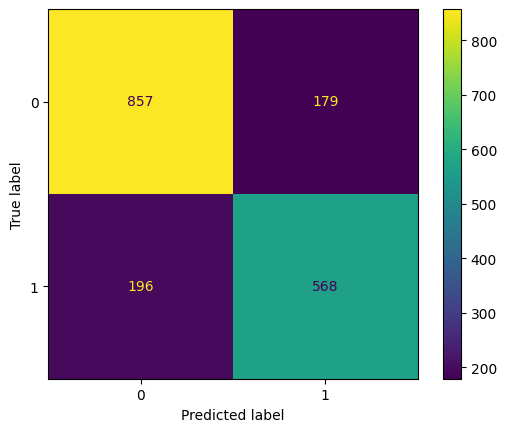

In [ ]:
clf = LogisticRegression(C = 0.5, penalty = 'l2', solver = 'newton-cg', max_iter = 5000)
modeloRL = clf.fit(x_train, np.ravel(y_train))
print("Regresión Logística: Exactitud (accuracy) con el conjunto de Validación = ", modeloRL.score(x_validated, y_validated))

pr = modeloRL.predict(x_validated)
cm = confusion_matrix(y_validated, pr)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
disp.plot()
plt.show()

**11. Aplica el modelo Red Neuronal en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.**

In [ ]:
neuronas = [i for i in range(1, 50, 5)]

for i in neuronas:
  mlpc = MLPClassifier(hidden_layer_sizes = (i, i), max_iter = 5000)

modeloNN = mlpc.fit(x_train, np.ravel(y_train))

print("Los mejores valores encontrados ", modeloNN.hidden_layer_sizes, modeloNN.score(x_validated, y_validated))

Los mejores valores encontrados  (46, 46) 0.6066666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Red Neuronal: Exactitud (accuracy) con el conjunto de Validación =  0.6311111111111111


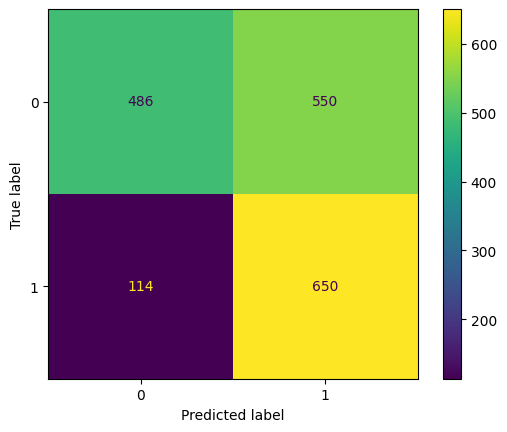

In [ ]:
mlpc = MLPClassifier(hidden_layer_sizes = (46, 46), max_iter = 5000)
modeloNN = mlpc.fit(x_train, y_train)
print("Red Neuronal: Exactitud (accuracy) con el conjunto de Validación = ", modeloNN.score(x_validated, y_validated))

pr = modeloNN.predict(x_validated)
cm = confusion_matrix(y_validated, pr)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
disp.plot()
plt.show()

**12. Selecciona el mejor modelo encontrado en los incisos anteriores y utiliza el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión.**

Regresión Logística: Exactitud (accuracy) con el conjunto de Prueba =  0.7972222222222223


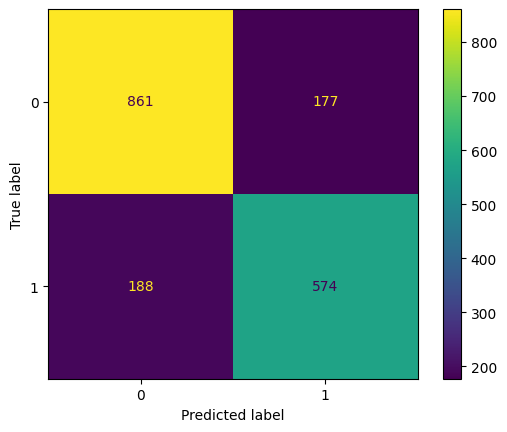

In [ ]:
clf = LogisticRegression(C = 0.5, penalty = 'l2', solver = 'newton-cg', max_iter = 5000)
modeloRL = clf.fit(x_test, np.ravel(y_test))
print("Regresión Logística: Exactitud (accuracy) con el conjunto de Prueba = ", modeloRL.score(x_test, y_test))

pr = modeloRL.predict(x_test)
cm = confusion_matrix(y_test, pr)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
disp.plot()
plt.show()

**13. Incluye tus conclusiones del problema, en particular, ¿qué puedes decir acerca del uso de técnicas de inteligencia artificial en problemas de mercadotecnia?**

El reto los establecimos como problema de clasificación y escogimos el modelo regresión logistica, debido a que mejor se ajusta con la regularización de los parámetros alcanzando aproximadamente un desempeño del 80% para las posibles adquisisiones de inversiones bancarias.
Basandonos en la matriz de confusión podemos observar que tenemos 177 Falsos Positivos y 188 Falsos Negativos, dandonos un total de 365 predicciones erroneas. podemos indicar que no exite mayor diferencia entre los falsos positivos y falsos negativos.
En la actualiadad la inteligencia artificial otorga varios beneficios en el área de mercadeo que se conoce como marketing digital aplicado al uso de las redes sociales, compras online, publicidad. Esta herramienta es util para la toma de decisiones gracias a los modelos predictivos de la inteligencia artificial, basandose en los consumos, comportamientos y experiencia de los usuarios.